In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv(r'C:\Users\dell\Desktop\python specialclass\MLproject-weekends\COMPONENT_FAILURE_PREDICTION-20240224T073338Z-001\COMPONENT_FAILURE_PREDICTION\component_failure_prediction.csv')
data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [4]:
data['Target'].value_counts(dropna=False)

0    9661
1     339
Name: Target, dtype: int64

In [5]:
data['Target'].value_counts(normalize=True)

0    0.9661
1    0.0339
Name: Target, dtype: float64

In [6]:
data['Failure Type'].value_counts(dropna=False)

No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: Failure Type, dtype: int64

In [7]:
data['Failure Type'].value_counts(normalize=True)

No Failure                  0.9652
Heat Dissipation Failure    0.0112
Power Failure               0.0095
Overstrain Failure          0.0078
Tool Wear Failure           0.0045
Random Failures             0.0018
Name: Failure Type, dtype: float64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [9]:
data.isna().sum().sum()

0

In [10]:
data['UDI'].value_counts().sum()

10000

In [11]:
data['Product ID'].value_counts().sum()

10000

In [12]:
# Since UDI and Product ID have all unique values, hence drop them
data.drop(['UDI','Product ID'],axis=1,inplace=True)

In [13]:
# Let's calculate the failure component and the reason of failure
df_failure=data[data.Target==1]
df_failure.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
50,L,298.9,309.1,2861,4.6,143,1,Power Failure
69,L,298.9,309.0,1410,65.7,191,1,Power Failure
77,L,298.8,308.9,1455,41.3,208,1,Tool Wear Failure
160,L,298.4,308.2,1282,60.7,216,1,Overstrain Failure
161,L,298.3,308.1,1412,52.3,218,1,Overstrain Failure


In [14]:
df_failure['Failure Type'].value_counts(normalize=True)

Heat Dissipation Failure    0.330383
Power Failure               0.280236
Overstrain Failure          0.230088
Tool Wear Failure           0.132743
No Failure                  0.026549
Name: Failure Type, dtype: float64

In [15]:
df_failure[df_failure['Failure Type']=='No Failure']

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
1437,H,298.8,309.9,1439,45.2,40,1,No Failure
2749,M,299.7,309.2,1685,28.9,179,1,No Failure
4044,M,301.9,310.9,1419,47.7,20,1,No Failure
4684,M,303.6,311.8,1421,44.8,101,1,No Failure
5536,M,302.3,311.8,1363,54.0,119,1,No Failure
5941,L,300.6,310.7,1438,48.5,78,1,No Failure
6478,L,300.5,309.8,1663,29.1,145,1,No Failure
8506,L,298.4,309.6,1710,27.3,163,1,No Failure
9015,L,297.2,308.1,1431,49.7,210,1,No Failure


In [16]:
# we can drop these observations because we are not sure about the reason of failure

In [17]:
drop_no_failure=df_failure[df_failure['Failure Type']=='No Failure'].index
drop_no_failure

Int64Index([1437, 2749, 4044, 4684, 5536, 5941, 6478, 8506, 9015], dtype='int64')

In [18]:
data=data.drop(drop_no_failure,axis=0)
data.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure


In [19]:
data.shape

(9991, 8)

In [20]:
df_no_failure=data[data['Target']==0]
df_no_failure.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure


In [21]:
df_no_failure['Failure Type'].value_counts()

No Failure         9643
Random Failures      18
Name: Failure Type, dtype: int64

In [22]:
df_no_failure[df_no_failure['Failure Type']=='Random Failures']

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
1221,M,297.0,308.3,1399,46.4,132,0,Random Failures
1302,L,298.6,309.8,1505,45.7,144,0,Random Failures
1748,H,298.4,307.7,1626,31.1,166,0,Random Failures
2072,L,299.6,309.5,1570,35.5,189,0,Random Failures
2559,L,299.3,309.0,1447,50.4,140,0,Random Failures
3065,M,300.1,309.2,1687,27.7,95,0,Random Failures
3452,H,301.6,310.5,1602,32.3,2,0,Random Failures
5471,L,302.7,312.3,1346,61.2,170,0,Random Failures
5489,L,302.6,312.1,1499,35.0,215,0,Random Failures
5495,H,302.9,312.5,1357,55.0,12,0,Random Failures


In [23]:
id_mismatch=df_no_failure[df_no_failure['Failure Type']=='Random Failures'].index
id_mismatch

Int64Index([1221, 1302, 1748, 2072, 2559, 3065, 3452, 5471, 5489, 5495, 5509,
            5553, 5639, 6091, 6913, 6960, 7488, 7868],
           dtype='int64')

In [24]:
data=data.drop(id_mismatch,axis=0)
data.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure


In [25]:
data.shape

(9973, 8)

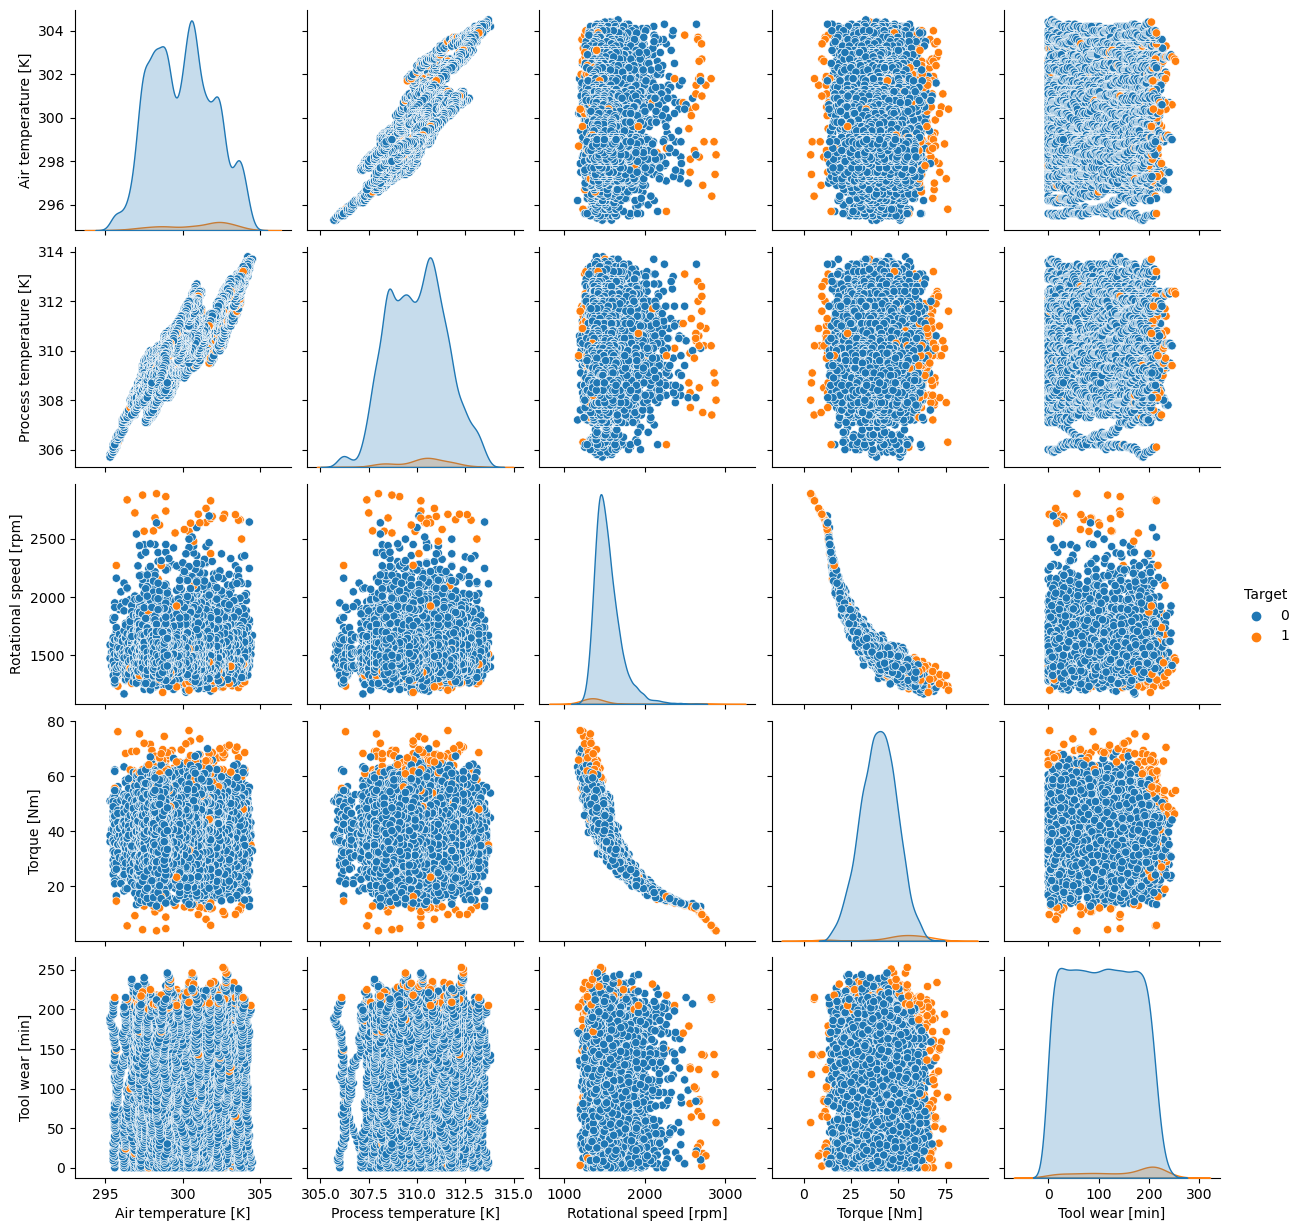

In [26]:
sns.pairplot(data,hue='Target')

In [27]:
# rotational speed and torque are inversely correlated
# air temperature and process temperature are positively correlated
# Failure is at extreme high or at extreme low (rotational speed and torque)

In [28]:
sns.pairplot(data,hue='Failure Type')

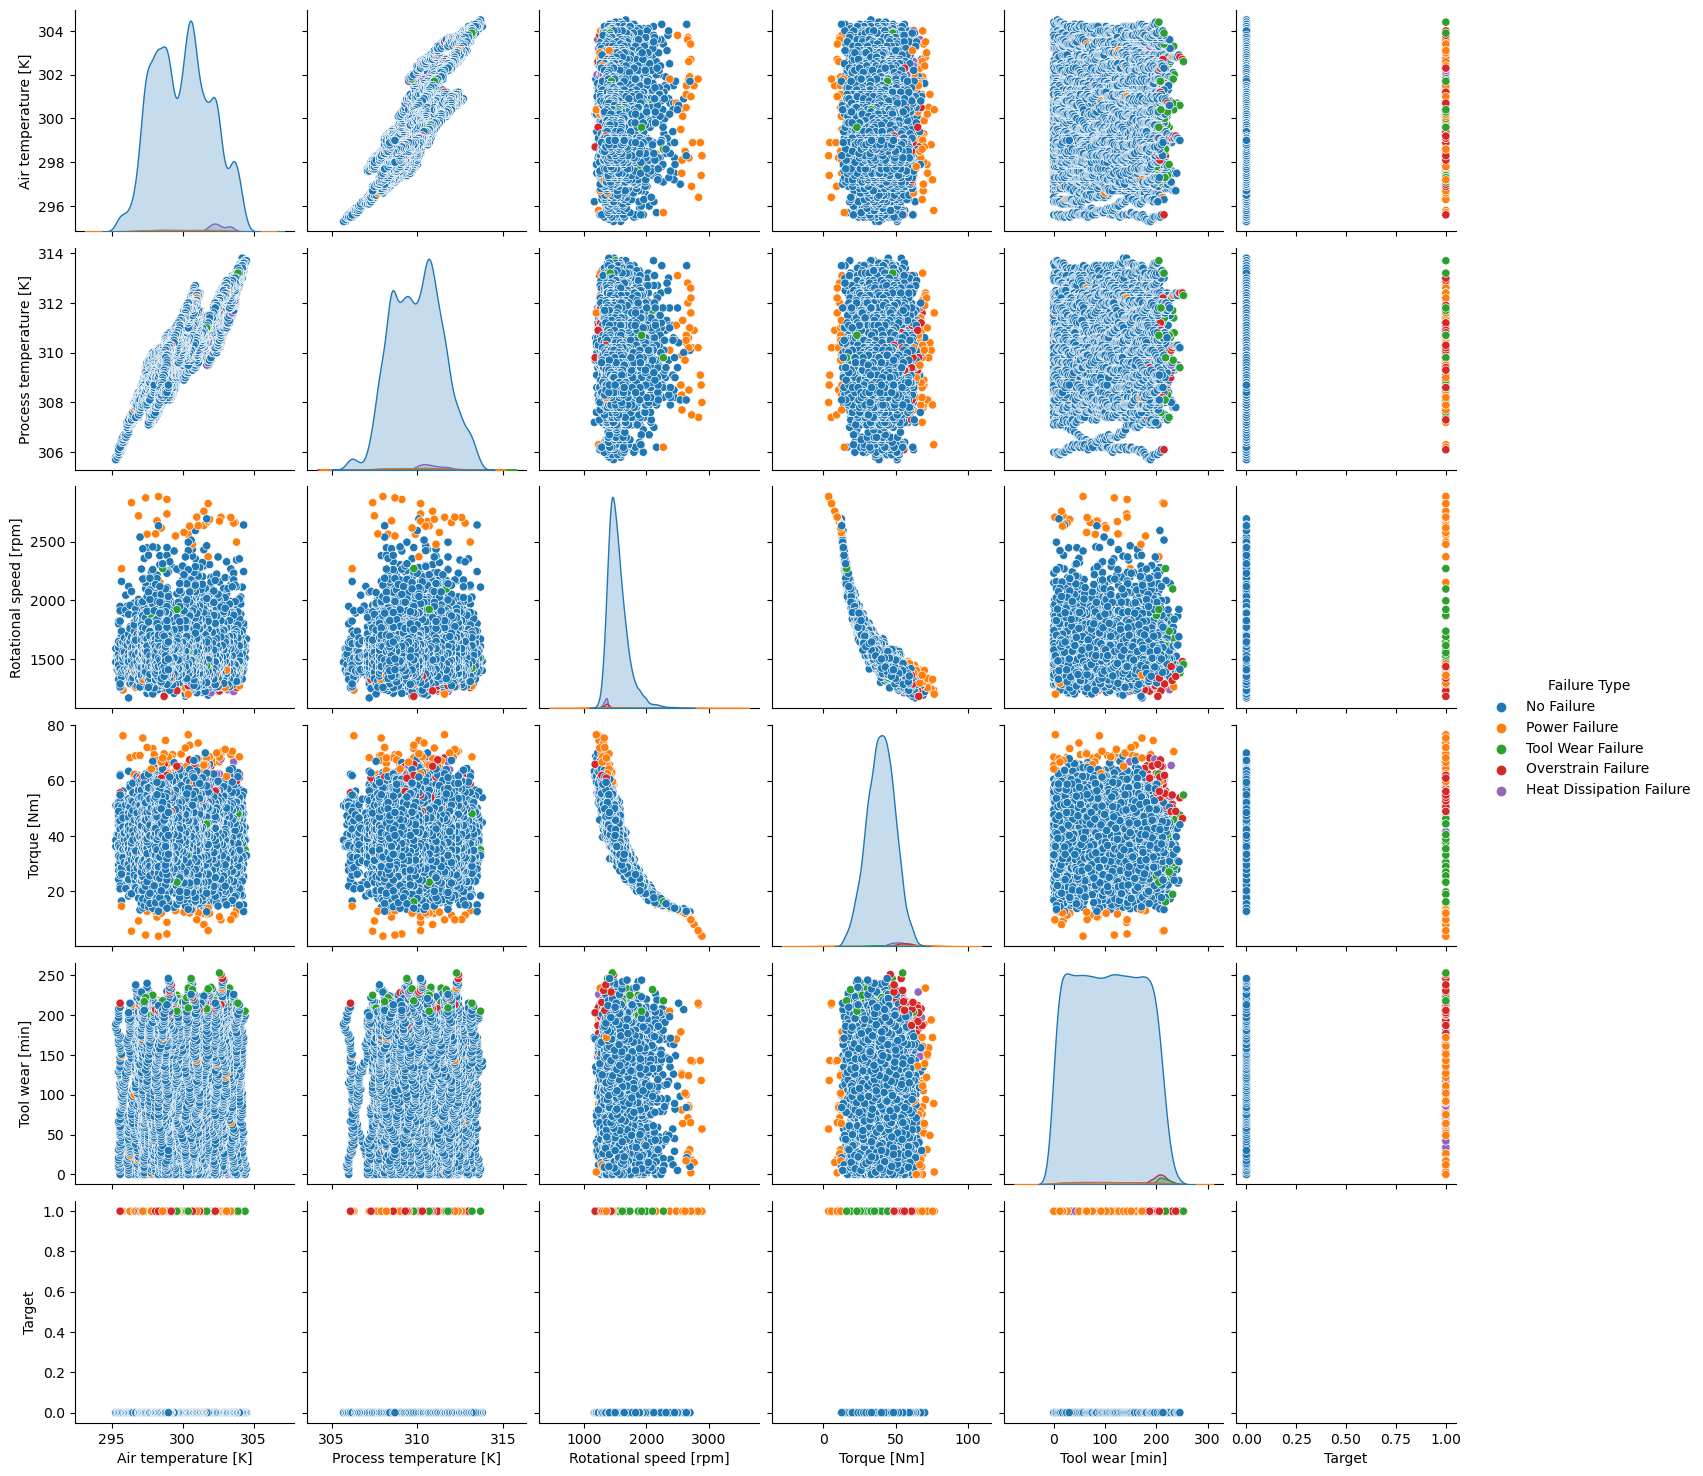

In [29]:
plt.show()

In [30]:
df2=data[["Rotational speed [rpm]","Torque [Nm]"]]
df2.head()

,Rotational speed [rpm],Torque [Nm]
0,1551,42.8
1,1408,46.3
2,1498,49.4
3,1433,39.5
4,1408,40.0


In [31]:
data.columns

Index(['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Target',
       'Failure Type'],
      dtype='object')

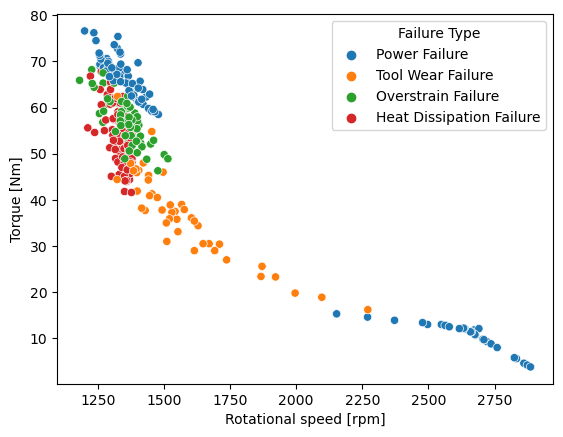

In [32]:
sns.scatterplot(data=data[data['Target']==1],x="Rotational speed [rpm]",y="Torque [Nm]",hue="Failure Type")
plt.show()

In [33]:
# Power Failure: At high and low values of torque, at low and high values of speed.
# Tool Wear Failure: At low to mid for speed, at mid to low for torque
# Overstarin Failure: At high values of torque and low values of speed.
# Heat Dissipation Failure: At high values of torque and low values of speed.

In [34]:
sns.pairplot(data,x_vars="Rotational speed [rpm]",y_vars="Torque [Nm]",hue="Target")

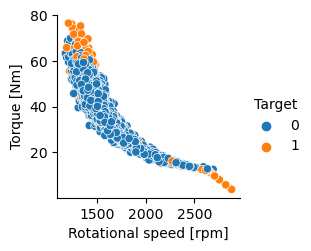

In [35]:
plt.show()

In [36]:
# Failure is at extreme low or high values of torque and speed

In [37]:
corr_matrix=data.corr()

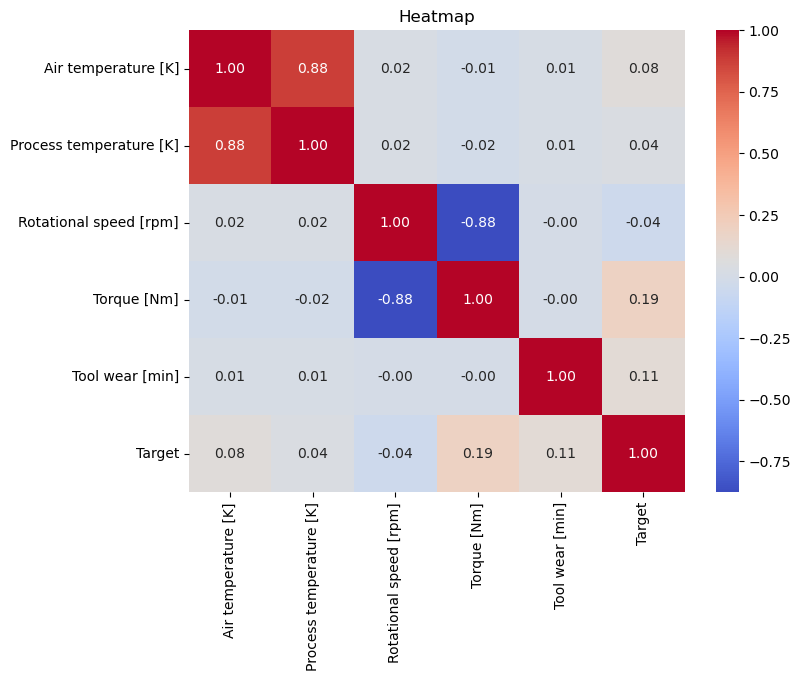

In [38]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Heatmap')
plt.show()

In [39]:
# since, no of columns is less hence not dropping Process temperature and Rotational Speed

In [40]:
failure_counts=data['Failure Type'].value_counts()
failure_counts

No Failure                  9643
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Name: Failure Type, dtype: int64

In [41]:
failure_counts.index

Index(['No Failure', 'Heat Dissipation Failure', 'Power Failure',
       'Overstrain Failure', 'Tool Wear Failure'],
      dtype='object')

In [42]:
# different quality components

In [43]:
data.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure


In [44]:
data['Type'].value_counts()

L    5984
M    2991
H     998
Name: Type, dtype: int64

In [45]:
Low_Quality=data[data['Type']=='L']
Low_Quality

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure
6,L,298.1,308.6,1558,42.4,14,0,No Failure
...,...,...,...,...,...,...,...,...
9988,L,298.9,308.6,1771,24.1,213,0,No Failure
9990,L,298.8,308.5,1527,36.2,3,0,No Failure
9992,L,298.8,308.4,1484,39.2,8,0,No Failure
9993,L,298.8,308.4,1401,47.3,10,0,No Failure


In [46]:
Medi_Quality=data[data['Type']=='M']
Medi_Quality

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
5,M,298.1,308.6,1425,41.9,11,0,No Failure
8,M,298.3,308.7,1667,28.6,18,0,No Failure
9,M,298.5,309.0,1741,28.0,21,0,No Failure
12,M,298.6,309.1,1339,51.1,34,0,No Failure
...,...,...,...,...,...,...,...,...
9989,M,298.8,308.5,1577,33.2,0,0,No Failure
9991,M,298.9,308.4,1827,26.1,5,0,No Failure
9995,M,298.8,308.4,1604,29.5,14,0,No Failure
9997,M,299.0,308.6,1645,33.4,22,0,No Failure


In [47]:
High_Quality=data[data['Type']=='H']
High_Quality

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
10,H,298.4,308.9,1782,23.9,24,0,No Failure
11,H,298.6,309.1,1423,44.3,29,0,No Failure
18,H,298.8,309.2,1306,54.5,50,0,No Failure
20,H,298.9,309.3,1375,42.7,58,0,No Failure
27,H,299.1,309.4,1811,24.6,77,0,No Failure
...,...,...,...,...,...,...,...,...
9978,H,298.6,308.3,1377,52.1,181,0,No Failure
9984,H,298.7,308.4,1432,42.8,197,0,No Failure
9985,H,298.7,308.5,1572,35.6,202,0,No Failure
9996,H,298.9,308.4,1632,31.8,17,0,No Failure


In [48]:
Low_Quality['Target'].value_counts(normalize=True)*100

0    96.139706
1     3.860294
Name: Target, dtype: float64

In [49]:
Medi_Quality['Target'].value_counts(normalize=True)*100

0    97.358743
1     2.641257
Name: Target, dtype: float64

In [50]:
High_Quality['Target'].value_counts(normalize=True)*100

0    97.995992
1     2.004008
Name: Target, dtype: float64

In [51]:
# Wrt Failure Low Quality has a higher percentage than medium and high, but the difference is not high

In [52]:
# Outlier analysis

In [53]:
data.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure


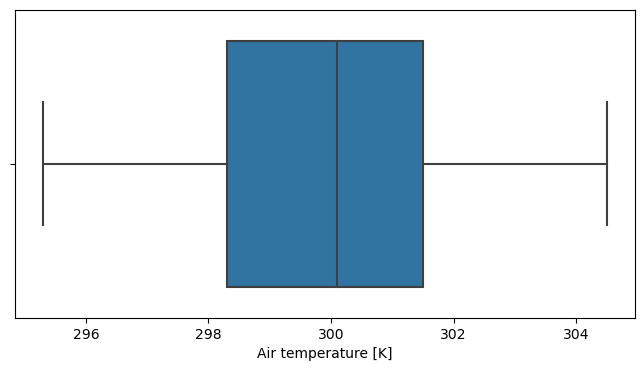

In [54]:
plt.figure(figsize=(8,4))
sns.boxplot(data['Air temperature [K]'])
plt.xlabel('Air temperature [K]')
plt.show()

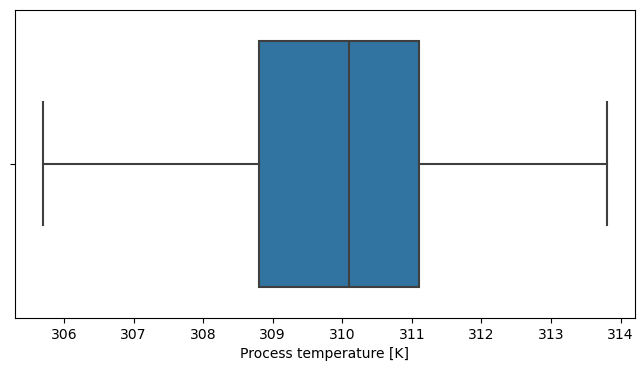

In [55]:
plt.figure(figsize=(8,4))
sns.boxplot(data['Process temperature [K]'])
plt.xlabel('Process temperature [K]')
plt.show()

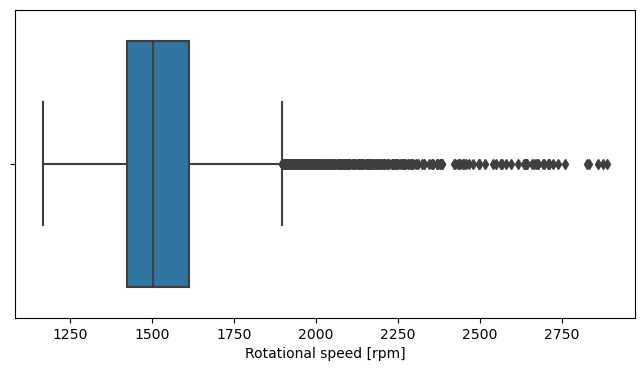

In [56]:
plt.figure(figsize=(8,4))
sns.boxplot(data['Rotational speed [rpm]'])
plt.xlabel('Rotational speed [rpm]')
plt.show()

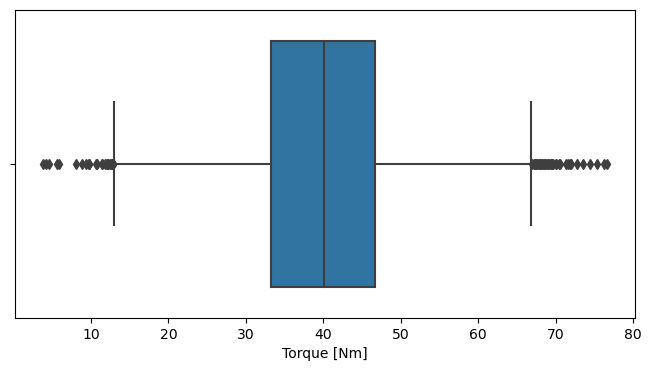

In [57]:
plt.figure(figsize=(8,4))
sns.boxplot(data['Torque [Nm]'])
plt.xlabel('Torque [Nm]')
plt.show()

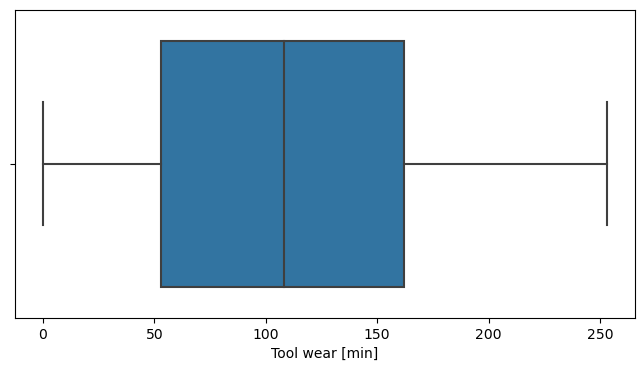

In [58]:
plt.figure(figsize=(8,4))
sns.boxplot(data['Tool wear [min]'])
plt.xlabel('Tool wear [min]')
plt.show()

In [59]:
# Keeping the outliers since, they appear as outliers as they are rare, also they may contain valuable information. 
# Tree based algorithms like Random Forest are robust to outliers.
# Outliers here may be part of the natural variability in the data, they should be kept.

In [60]:
data.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure


In [61]:
# Label Encoding

In [62]:
data['Type']=data['Type'].map({'L':0,'M':1,'H':2})

In [63]:
data['Type'].value_counts()

0    5984
1    2991
2     998
Name: Type, dtype: int64

In [64]:
data['Failure Type'].value_counts()

No Failure                  9643
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Name: Failure Type, dtype: int64

In [65]:
data['Failure Type']=data['Failure Type'].map({'No Failure':0,'Heat Dissipation Failure':1,'Power Failure':2,'Overstrain Failure':3,'Tool Wear Failure':4})

In [66]:
data['Failure Type'].value_counts()

0    9643
1     112
2      95
3      78
4      45
Name: Failure Type, dtype: int64

In [67]:
data.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,298.1,308.6,1551,42.8,0,0,0
1,0,298.2,308.7,1408,46.3,3,0,0
2,0,298.1,308.5,1498,49.4,5,0,0
3,0,298.2,308.6,1433,39.5,7,0,0
4,0,298.2,308.7,1408,40.0,9,0,0


In [68]:
# Now, we will do first Binary classification for Target column

In [69]:
X=data.drop(['Target','Failure Type'],axis=1)
Y=data['Target']

In [70]:
Y.value_counts()

0    9643
1     330
Name: Target, dtype: int64

In [71]:
# In the real world scenario we may have to keep the dataset as imbalanced only sometimes because we may have recieved vey 
# few samples of 1 particular class, here the class being 1. So we may need to ask the client to fetch us with more samples
# for class 1.

In [72]:
# Let us apply scaling, now though Type has only three unique values (0,1, and 2) hence usually no need to scale it. However,
# to keep the preprocessing uniform all through out, applying scaling on it won't be wrong also, as we can keep consistency.

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
from sklearn.preprocessing import MinMaxScaler

In [75]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=100)
# stratify is for stratified sampling, where distribution of Y will be consistent for both the training and test datasets.
# Here same class proportions will be maintained for both sets, which is important for an imbalanced dataset.

In [76]:
features=['Air temperature [K]','Process temperature [K]','Rotational speed [rpm]','Torque [Nm]','Tool wear [min]']

In [77]:
mms=MinMaxScaler()

In [78]:
X_train[features]=mms.fit_transform(X_train[features])

In [79]:
X_test[features]=mms.transform(X_test[features])

In [80]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [81]:
from sklearn.linear_model import LogisticRegression

In [82]:
rf=RandomForestClassifier()
ada=AdaBoostClassifier()
gbc=GradientBoostingClassifier()
bc=BaggingClassifier(base_estimator=rf)
log_reg=LogisticRegression(class_weight='balanced',multi_class='ovr')

In [83]:
# class_weight='balanced', this parameter adjusts the weights of the classes being inversely proportional to their frequencies.
# An imbalanced dataset is handled, where more importance is given to the minority class.

# multi_class='ovr' this is the 'one vs rest' strategy applied for multi-class classification problem. Model will train a seperate
# binary classifier for each class, where one class is taken as +ve and the rest are taken as -ves.

In [84]:
from sklearn.model_selection import GridSearchCV,cross_val_score

In [85]:
model=RandomForestClassifier(random_state=100)

In [86]:
param_grid={
    'n_estimators':[100,200,300],
    'max_depth':[None,10,20,30],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4],
    'bootstrap':[False,True]
}

In [87]:
grid_search=GridSearchCV(estimator=model,param_grid=param_grid,cv=5,n_jobs=-1,verbose=2,scoring='roc_auc')

In [88]:
grid_search.fit(X_train,Y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=100),
             n_jobs=-1,
             param_grid={'bootstrap': [False, True],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='roc_auc', verbose=2)

In [89]:
best_model=grid_search.best_estimator_
print("Best model hyperparameters are:",grid_search.best_params_)

Best model hyperparameters are: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


In [90]:
Y_pred=best_model.predict(X_test)
Y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [91]:
Y_pred_proba=best_model.predict_proba(X_test)[:,1]
Y_pred_proba

array([0.00301916, 0.0033088 , 0.00052998, ..., 0.00040032, 0.00010835,
       0.00042609])

In [92]:
from sklearn.metrics import classification_report,accuracy_score,roc_curve,roc_auc_score

In [93]:
accuracy=accuracy_score(Y_test,Y_pred)
roc_auc=roc_auc_score(Y_test,Y_pred_proba)
report=classification_report(Y_test,Y_pred)

In [94]:
print("accuracy is:",accuracy)
print("roc_auc is:",roc_auc)
print("report is:",report)

accuracy is: 0.9809523809523809
roc_auc is: 0.9869849348854015
report is:               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1929
           1       0.87      0.50      0.63        66

    accuracy                           0.98      1995
   macro avg       0.93      0.75      0.81      1995
weighted avg       0.98      0.98      0.98      1995



In [95]:
# apply smote for data imbalancing
from imblearn.over_sampling import SMOTE

In [96]:
smote=SMOTE(random_state=100)

In [97]:
Y_train.value_counts()

0    7714
1     264
Name: Target, dtype: int64

In [98]:
X_train_resampled,Y_train_resampled=smote.fit_resample(X_train,Y_train)

In [99]:
Y_train_resampled.value_counts()

0    7714
1    7714
Name: Target, dtype: int64

In [100]:
from sklearn.model_selection import GridSearchCV,cross_val_score
model1=RandomForestClassifier(random_state=100)

In [101]:
param_grid={
    'n_estimators':[100,200,300],
    'max_depth':[None,10,20,30],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4],
    'bootstrap':[False,True]
}

In [102]:
grid_search=GridSearchCV(estimator=model1,param_grid=param_grid,cv=5,n_jobs=-1,verbose=2,scoring='roc_auc')

In [103]:
grid_search.fit(X_train_resampled,Y_train_resampled)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=100),
             n_jobs=-1,
             param_grid={'bootstrap': [False, True],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='roc_auc', verbose=2)

In [104]:
best_model1=grid_search.best_estimator_
print("Best model hyperparameters are:",grid_search.best_params_)

Best model hyperparameters are: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [105]:
Y_pred=best_model1.predict(X_test)
Y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [106]:
Y_pred_proba=best_model1.predict_proba(X_test)[:,1]
Y_pred_proba

array([0.00333333, 0.        , 0.        , ..., 0.        , 0.        ,
       0.00666667])

In [107]:
from sklearn.metrics import classification_report,accuracy_score,roc_curve,roc_auc_score

In [108]:
accuracy=accuracy_score(Y_test,Y_pred)
roc_auc=roc_auc_score(Y_test,Y_pred_proba)
report=classification_report(Y_test,Y_pred)

In [109]:
print("accuracy is:",accuracy)
print("roc_auc is:",roc_auc)
print("report is:",report)

accuracy is: 0.9764411027568922
roc_auc is: 0.9845028826366308
report is:               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1929
           1       0.64      0.65      0.65        66

    accuracy                           0.98      1995
   macro avg       0.81      0.82      0.82      1995
weighted avg       0.98      0.98      0.98      1995



In [110]:
# Some improvement has happened.

In [112]:
data.head(1)

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,298.1,308.6,1551,42.8,0,0,0


In [113]:
Y1=data['Failure Type']
# The other target feature

In [114]:
Y1.value_counts()

0    9643
1     112
2      95
3      78
4      45
Name: Failure Type, dtype: int64

In [115]:
X_train1,X_test1,Y_train1,Y_test1=train_test_split(X,Y1,test_size=0.2,stratify=Y1,random_state=100)

In [116]:
X_train1[features]=mms.fit_transform(X_train1[features])

In [117]:
X_test1[features]=mms.transform(X_test1[features])

In [118]:
from sklearn.model_selection import GridSearchCV,cross_val_score
model2=RandomForestClassifier(random_state=100)

In [119]:
param_grid={
    'n_estimators':[100,200,300],
    'max_depth':[None,10,20,30],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4],
    'bootstrap':[False,True]
}

In [120]:
grid_search=GridSearchCV(estimator=model2,param_grid=param_grid,cv=5,n_jobs=-1,verbose=2,scoring='roc_auc_ovr')
# One vs rest strategy for multiclass classification problem.

In [121]:
grid_search.fit(X_train1,Y_train1)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=100),
             n_jobs=-1,
             param_grid={'bootstrap': [False, True],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='roc_auc_ovr', verbose=2)

In [122]:
best_model2=grid_search.best_estimator_
print("Best hyperparameters are:",grid_search.best_params_)

Best hyperparameters are: {'bootstrap': False, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300}


In [123]:
Y_pred=best_model2.predict(X_test1)
Y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [124]:
Y_pred_proba=best_model2.predict_proba(X_test1)
Y_pred_proba

array([[9.97765281e-01, 2.26757668e-04, 3.86655487e-04, 1.46288386e-03,
        1.58422319e-04],
       [9.99068004e-01, 4.14588313e-04, 1.02751112e-04, 5.80592455e-05,
        3.56597655e-04],
       [9.99546314e-01, 1.00125196e-04, 4.65148317e-05, 2.18632749e-05,
        2.85183010e-04],
       ...,
       [9.99519627e-01, 1.07467340e-04, 4.65148317e-05, 2.18632749e-05,
        3.04527278e-04],
       [9.99446260e-01, 2.65741918e-05, 2.59710718e-04, 3.13878858e-05,
        2.36067510e-04],
       [9.99192817e-01, 7.48443884e-05, 3.41199401e-04, 1.35484209e-04,
        2.55655019e-04]])

In [125]:
accuracy=accuracy_score(Y_test1,Y_pred)

In [126]:
from sklearn.preprocessing import label_binarize

In [127]:
Y_test1_bins=label_binarize(Y_test1,classes=[0,1,2,3,4])
roc_auc=roc_auc_score(Y_test1_bins,Y_pred_proba,multi_class='ovr')

In [128]:
report=classification_report(Y_test1,Y_pred)

In [129]:
print("accuracy is:",accuracy)
print("roc_auc is:",roc_auc)
print("report is:",report)

accuracy is: 0.9859649122807017
roc_auc is: 0.9642065262860491
report is:               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1929
           1       0.95      0.82      0.88        22
           2       0.81      0.68      0.74        19
           3       0.91      0.62      0.74        16
           4       0.00      0.00      0.00         9

    accuracy                           0.99      1995
   macro avg       0.73      0.63      0.67      1995
weighted avg       0.98      0.99      0.98      1995



In [130]:
from imblearn.over_sampling import SMOTE

In [131]:
smote=SMOTE(random_state=100)

In [132]:
Y_train1.value_counts()
# Huge data imbalancing

0    7714
1      90
2      76
3      62
4      36
Name: Failure Type, dtype: int64

In [133]:
X_train1_resampled,Y_train1_resampled=smote.fit_resample(X_train1,Y_train1)

In [134]:
Y_train1_resampled.value_counts()

0    7714
3    7714
2    7714
1    7714
4    7714
Name: Failure Type, dtype: int64

In [135]:
model3=RandomForestClassifier(random_state=100)

In [136]:
param_grid={
    'n_estimators':[100,200,300],
    'max_depth':[None,10,20,30],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4],
    'bootstrap':[False,True]
}

In [137]:
grid_search=GridSearchCV(estimator=model3,param_grid=param_grid,cv=5,n_jobs=-1,verbose=2,scoring='roc_auc_ovr')

In [138]:
grid_search.fit(X_train1_resampled,Y_train1_resampled)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=100),
             n_jobs=-1,
             param_grid={'bootstrap': [False, True],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='roc_auc_ovr', verbose=2)

In [139]:
best_model3=grid_search.best_estimator_
print("Best hyperparameters are:",grid_search.best_params_)

Best hyperparameters are: {'bootstrap': False, 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [140]:
Y_pred=best_model3.predict(X_test1)
Y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [141]:
Y_pred_proba=best_model3.predict_proba(X_test1)
Y_pred_proba

array([[1.   , 0.   , 0.   , 0.   , 0.   ],
       [0.995, 0.   , 0.005, 0.   , 0.   ],
       [1.   , 0.   , 0.   , 0.   , 0.   ],
       ...,
       [1.   , 0.   , 0.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   , 0.   , 0.   ]])

In [142]:
accuracy=accuracy_score(Y_test1,Y_pred)

In [143]:
from sklearn.preprocessing import label_binarize

In [144]:
Y_test1_bins=label_binarize(Y_test1,classes=[0,1,2,3,4])
roc_auc=roc_auc_score(Y_test1_bins,Y_pred_proba,multi_class='ovr')

In [145]:
report=classification_report(Y_test1,Y_pred)

In [146]:
print("accuracy is:",accuracy)
print("roc_auc is:",roc_auc)
print("report is:",report)

accuracy is: 0.9724310776942355
roc_auc is: 0.9834175025892009
report is:               precision    recall  f1-score   support

           0       0.99      0.98      0.99      1929
           1       0.90      0.86      0.88        22
           2       0.79      0.58      0.67        19
           3       0.75      0.75      0.75        16
           4       0.07      0.22      0.11         9

    accuracy                           0.97      1995
   macro avg       0.70      0.68      0.68      1995
weighted avg       0.98      0.97      0.98      1995



In [147]:
# Much improvement can be seen after OverSampling.

In [148]:
# Next try with AdaBoostclassifier

In [150]:
X_train2,X_test2,Y_train2,Y_test2=train_test_split(X,Y,test_size=0.2,random_state=100)

In [151]:
X_train2[features]=mms.fit_transform(X_train2[features])

In [152]:
X_test2[features]=mms.transform(X_test2[features])

In [153]:
Y_train2.value_counts()

0    7706
1     272
Name: Target, dtype: int64

In [154]:
X_train2_resampled,Y_train2_resampled=smote.fit_resample(X_train2,Y_train2)

In [155]:
Y_train2_resampled.value_counts()

0    7706
1    7706
Name: Target, dtype: int64

In [156]:
model4=AdaBoostClassifier(random_state=100)

In [157]:
#param_grid={
#    'n_estimators':[50,100,200300,500],
#    'learning_rate':[0.01,0.1,0.5,1.0],
#    'base_estimator':[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=3)]
#}

In [158]:
model4.fit(X_train2_resampled,Y_train2_resampled)

AdaBoostClassifier(random_state=100)

In [159]:
Y_pred=model4.predict(X_test2)
Y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [160]:
Y_pred_proba=model4.predict_proba(X_test2)[:,1]
Y_pred_proba

array([0.46878501, 0.47406   , 0.47522454, ..., 0.4962362 , 0.47518775,
       0.46853945])

In [161]:
accuracy=accuracy_score(Y_test2,Y_pred)
roc_auc=roc_auc_score(Y_test2,Y_pred_proba)
report=classification_report(Y_test2,Y_pred)

In [162]:
print("accuracy is:",accuracy)
print("roc_auc is:",roc_auc)
print("report is:",report)

accuracy is: 0.9273182957393483
roc_auc is: 0.9687038256813771
report is:               precision    recall  f1-score   support

           0       1.00      0.93      0.96      1937
           1       0.27      0.90      0.42        58

    accuracy                           0.93      1995
   macro avg       0.63      0.91      0.69      1995
weighted avg       0.98      0.93      0.95      1995



In [163]:
Y1=data['Failure Type']

In [164]:
Y1.value_counts()

0    9643
1     112
2      95
3      78
4      45
Name: Failure Type, dtype: int64

In [165]:
X_train3,X_test3,Y_train3,Y_test3=train_test_split(X,Y1,test_size=0.2,random_state=100)

In [166]:
X_train3[features]=mms.fit_transform(X_train3[features])

In [167]:
X_test3[features]=mms.transform(X_test3[features])

In [168]:
X_train3_resampled,Y_train3_resampled=smote.fit_resample(X_train3,Y_train3)

In [169]:
Y_train3_resampled.value_counts()

0    7706
1    7706
3    7706
2    7706
4    7706
Name: Failure Type, dtype: int64

In [170]:
model5=AdaBoostClassifier(random_state=100)

In [171]:
model5.fit(X_train3_resampled,Y_train3_resampled)

AdaBoostClassifier(random_state=100)

In [172]:
Y_pred=model5.predict(X_test3)

In [173]:
Y_pred_proba=model5.predict_proba(X_test3)

In [174]:
accuracy=accuracy_score(Y_test3,Y_pred)

In [175]:
from sklearn.preprocessing import label_binarize

In [176]:
Y_test3_bins=label_binarize(Y_test3,classes=[0,1,2,3,4])
roc_auc=roc_auc_score(Y_test3_bins,Y_pred_proba,multi_class='ovr')

In [177]:
report=classification_report(Y_test3,Y_pred)

In [178]:
print("accuracy is:",accuracy)
print("roc_auc is:",roc_auc)
print("report is:",report)

accuracy is: 0.29473684210526313
roc_auc is: 0.785196786390989
report is:               precision    recall  f1-score   support

           0       0.97      0.29      0.45      1937
           1       0.18      0.18      0.18        22
           2       0.01      0.68      0.02        19
           3       0.16      0.46      0.24        13
           4       0.01      0.50      0.02         4

    accuracy                           0.29      1995
   macro avg       0.27      0.42      0.18      1995
weighted avg       0.94      0.29      0.44      1995



In [179]:
# BaggingClassifier

In [180]:
X_train4,X_test4,Y_train4,Y_test4=train_test_split(X,Y,test_size=0.2,random_state=100)

In [181]:
X_train4[features]=mms.fit_transform(X_train4[features])

In [182]:
X_test4[features]=mms.transform(X_test4[features])

In [183]:
Y.value_counts()

0    9643
1     330
Name: Target, dtype: int64

In [184]:
X_train4_resampled,Y_train4_resampled=smote.fit_resample(X_train4,Y_train4)

In [185]:
Y_train4_resampled.value_counts()

0    7706
1    7706
Name: Target, dtype: int64

In [186]:
model6=BaggingClassifier(random_state=100)

In [187]:
model6.fit(X_train4_resampled,Y_train4_resampled)

BaggingClassifier(random_state=100)

In [188]:
Y_pred=model6.predict(X_test4)

In [189]:
Y_pred_proba=model6.predict_proba(X_test4)[:,1]

In [190]:
accuracy=accuracy_score(Y_test4,Y_pred)
roc_auc=roc_auc_score(Y_test4,Y_pred_proba)
report=classification_report(Y_test4,Y_pred)

In [191]:
print("accuracy is:",accuracy)
print("roc_auc is:",roc_auc)
print("report is:",report)

accuracy is: 0.9714285714285714
roc_auc is: 0.9678137183344312
report is:               precision    recall  f1-score   support

           0       0.99      0.98      0.99      1937
           1       0.51      0.81      0.62        58

    accuracy                           0.97      1995
   macro avg       0.75      0.89      0.80      1995
weighted avg       0.98      0.97      0.97      1995



In [192]:
Y1.value_counts()

0    9643
1     112
2      95
3      78
4      45
Name: Failure Type, dtype: int64

In [193]:
X_train5,X_test5,Y_train5,Y_test5=train_test_split(X,Y1,test_size=0.2,random_state=100)

In [194]:
X_train5[features]=mms.fit_transform(X_train5[features])

In [195]:
X_test5[features]=mms.transform(X_test5[features])

In [196]:
X_train5_resampled,Y_train5_resampled=smote.fit_resample(X_train5,Y_train5)

In [197]:
Y_train5_resampled.value_counts()

0    7706
1    7706
3    7706
2    7706
4    7706
Name: Failure Type, dtype: int64

In [198]:
model7=BaggingClassifier(random_state=100)

In [199]:
model7.fit(X_train5_resampled,Y_train5_resampled)

BaggingClassifier(random_state=100)

In [200]:
Y_pred=model7.predict(X_test5)

In [201]:
Y_pred_proba=model7.predict_proba(X_test5)

In [202]:
accuracy=accuracy_score(Y_test5,Y_pred)

In [203]:
from sklearn.preprocessing import label_binarize

In [204]:
Y_test5_bins=label_binarize(Y_test5,classes=[0,1,2,3,4])
roc_auc=roc_auc_score(Y_test5_bins,Y_pred_proba,multi_class='ovr')

In [205]:
report=classification_report(Y_test5,Y_pred)

In [206]:
print("accuracy is:",accuracy)
print("roc_auc is:",roc_auc)
print("report is:",report)

accuracy is: 0.9704260651629073
roc_auc is: 0.8855919821705944
report is:               precision    recall  f1-score   support

           0       0.99      0.98      0.99      1937
           1       0.69      0.91      0.78        22
           2       0.82      0.74      0.78        19
           3       0.62      0.77      0.69        13
           4       0.00      0.00      0.00         4

    accuracy                           0.97      1995
   macro avg       0.63      0.68      0.65      1995
weighted avg       0.99      0.97      0.98      1995



In [207]:
# LogisticRegression

In [208]:
X_train6,X_test6,Y_train6,Y_test6=train_test_split(X,Y,test_size=0.2,random_state=100)

In [209]:
X_train6[features]=mms.fit_transform(X_train6[features])

In [210]:
X_test6[features]=mms.transform(X_test6[features])

In [211]:
X_train6_resampled,Y_train6_resampled=smote.fit_resample(X_train6,Y_train6)

In [212]:
Y_train6_resampled.value_counts()

0    7706
1    7706
Name: Target, dtype: int64

In [213]:
model8=LogisticRegression(random_state=100)

In [214]:
model8.fit(X_train6_resampled,Y_train6_resampled)

LogisticRegression(random_state=100)

In [215]:
Y_pred=model8.predict(X_test6)

In [216]:
Y_pred_proba=model8.predict_proba(X_test6)[:,1]

In [217]:
accuracy=accuracy_score(Y_test6,Y_pred)
roc_curve=roc_auc_score(Y_test6,Y_pred_proba)
report=classification_report(Y_test6,Y_pred)

In [218]:
print("accuracy is:",accuracy)
print("roc_auc is:",roc_auc)
print("report is:",report)

accuracy is: 0.8390977443609022
roc_auc is: 0.8855919821705944
report is:               precision    recall  f1-score   support

           0       1.00      0.84      0.91      1937
           1       0.14      0.88      0.24        58

    accuracy                           0.84      1995
   macro avg       0.57      0.86      0.58      1995
weighted avg       0.97      0.84      0.89      1995



In [219]:
Y1.value_counts()

0    9643
1     112
2      95
3      78
4      45
Name: Failure Type, dtype: int64

In [220]:
X_train7,X_test7,Y_train7,Y_test7=train_test_split(X,Y1,test_size=0.2,random_state=100)

In [221]:
X_train7[features]=mms.fit_transform(X_train7[features])

In [222]:
X_test7[features]=mms.transform(X_test7[features])

In [223]:
X_train7_resampled,Y_train7_resampled=smote.fit_resample(X_train7,Y_train7)

In [224]:
Y_train7_resampled.value_counts()

0    7706
1    7706
3    7706
2    7706
4    7706
Name: Failure Type, dtype: int64

In [225]:
model9=LogisticRegression(random_state=100)

In [226]:
model9.fit(X_train7_resampled,Y_train7_resampled)

LogisticRegression(random_state=100)

In [227]:
Y_pred=model9.predict(X_test7)

In [228]:
Y_pred_proba=model9.predict_proba(X_test7)

In [229]:
accuracy=accuracy_score(Y_test7,Y_pred)

In [230]:
Y_test7_bins=label_binarize(Y_test7,classes=[0,1,2,3,4])
roc_auc=roc_auc_score(Y_test7_bins,Y_pred_proba,multi_class='ovr')

In [231]:
report=classification_report(Y_test7,Y_pred)

In [232]:
print("accuracy is:",accuracy)
print("roc_auc is:",roc_auc)
print("report is:",report)

accuracy is: 0.8471177944862155
roc_auc is: 0.974812061141732
report is:               precision    recall  f1-score   support

           0       1.00      0.85      0.92      1937
           1       0.21      0.95      0.34        22
           2       0.33      0.95      0.49        19
           3       0.26      0.92      0.40        13
           4       0.01      0.50      0.03         4

    accuracy                           0.85      1995
   macro avg       0.36      0.83      0.44      1995
weighted avg       0.98      0.85      0.90      1995

